# Car Price Prediction

## Introduction

This project predicts car prices using multiple linear regression. It demonstrates data analysis, visualization, and machine learning skills, applying theoretical knowledge to practical scenarios.

The primary objective is to build a machine learning model to predict car prices in India based on their characteristics. The dataset used includes information about various car features, such as mileage, engine size, and brand, along with their corresponding prices in Indian rupees. This project serves as a practical exercise in applying regression techniques to solve real-world problems.



## Dataset


| Column Name	           | Description                                                                                                                                                 |
|------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------|
| Car_ID                 | Unique identifier for each car listing.                                                                                         |
| Brand                  |The brand or manufacturer of the car (e.g., Toyota, Honda, Ford, etc.).                                                                       |
| Model                  | The model of the car (e.g., Camry, Civic, Mustang, etc.).                                                                  |
| Year                   | The year the car was manufactured.                                                                                                                            |
| Kilometers_Driven      | The total distance the car has been driven in kilometers.                                                                                                              |
| Fuel_Type              | The type of fuel the car uses (e.g., petrol, diesel, electric, etc.).                                                                      |
| Transmission           | The type of transmission the car has (e.g., manual, automatic).                                                                                          |
| Owner_Type             | 	The number of previous owners the car has had (e.g., first, second, third).                                                                           |
| Mileage                | The fuel efficiency of the car in kilometers per liter.                                                                                                   |
| Engine                 | The engine capacity of the car in cubic centimeters (CC).                                                                                                   |
| Power                  | The maximum power of the car in brake horsepower (bhp).                                                                                               |
| Seats                  | 	The number of seats in the car.                                                                                                                           |
| Price                  | The price of the car in INR (Indian rupees), which is the target variable for prediction.                                                                  |

# Imports

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
import seaborn as sns
import statsmodels.api as sm

# 1. Data Exploration and Preprocessing

### Loading the dataset into a pandas DataFrame.

In [3]:
df = pd.read_csv('drive/MyDrive/Colab Notebooks/data/cars.csv')

Explore the data types of columns and entries.

In [4]:
df.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


Display information about the DataFrame, including the data types of each column and the number of non-null values.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Car_ID             100 non-null    int64 
 1   Brand              100 non-null    object
 2   Model              100 non-null    object
 3   Year               100 non-null    int64 
 4   Kilometers_Driven  100 non-null    int64 
 5   Fuel_Type          100 non-null    object
 6   Transmission       100 non-null    object
 7   Owner_Type         100 non-null    object
 8   Mileage            100 non-null    int64 
 9   Engine             100 non-null    int64 
 10  Power              100 non-null    int64 
 11  Seats              100 non-null    int64 
 12  Price              100 non-null    int64 
dtypes: int64(8), object(5)
memory usage: 10.3+ KB


## 2. Categorical Variable Analysis

Analyze the categorical columns in the dataset to understand their unique values and types.

In [6]:
df.select_dtypes(include=['object']).nunique()

,0
Brand,11
Model,58
Fuel_Type,2
Transmission,2
Owner_Type,3


The dataset contains 8 numerical and 5 categorical columns. Among them:

- 2 binary columns: Fuel_Type, Transmission (contain only two values).
- 2 multicategory columns: Brand, Model (contain more than two values and have no order relationship).
- 1 ordinal column: Owner_Type (values have an order: First, Second, Third).

## 3. Data Splitting
- Split the data into training and testing sets to evaluate the performance of the machine learning model.
-  Allocate 20% of the data for testing and use a random_state of 12 for reproducibility.
-  The 'Price' column is the target variable for prediction.

In [7]:
# Splitting data into training and testing sets
inputs = df.drop(columns=['Price'])
targets = df['Price']

X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.2, random_state=12)

## 4. Encoding Categorical Columns

- Binary variables like Fuel_Type and Transmission are encoded as 0 or 1.
- Brand is encoded using OneHotEncoder.
- Owner_Type is encoded with OrdinalEncoder, respecting its ordered nature.
- Model is also encoded ordinally based on average car prices.


In [8]:
df['Fuel_Type'].value_counts(), df['Transmission'].value_counts()

(Fuel_Type
 Petrol    52
 Diesel    48
 Name: count, dtype: int64,
 Transmission
 Automatic    57
 Manual       43
 Name: count, dtype: int64)

In [9]:
# Encoding binary columns: Fuel_Type and Transmission
fuel_type_flag = {'Diesel': 0, 'Petrol': 1}
X_train['Fuel_Type_flag'] = X_train.Fuel_Type.map(fuel_type_flag)
X_test['Fuel_Type_flag'] = X_test.Fuel_Type.map(fuel_type_flag)

transmission_flag = {'Manual': 0, 'Automatic': 1}
X_train['Transmission_flag'] = X_train.Transmission.map(transmission_flag)
X_test['Transmission_flag'] = X_test.Transmission.map(transmission_flag)

**OneHotEncoder** for the 'Brand' column

In [10]:
# Initializing OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fitting the encoder on training data
encoder.fit(X_train[['Brand']])

# Transforming and adding encoded values to datasets
brand_train_encoded = encoder.transform(X_train[['Brand']])
brand_test_encoded = encoder.transform(X_test[['Brand']])

# Getting column names
brand_columns = encoder.get_feature_names_out(['Brand'])

# Adding encoded columns to X_train and X_test
X_train = X_train.join(pd.DataFrame(brand_train_encoded, columns=brand_columns, index=X_train.index))
X_test = X_test.join(pd.DataFrame(brand_test_encoded, columns=brand_columns, index=X_test.index))



**OrdinalEncoder** for the 'Owner_Type' column

In [14]:
ordenc = OrdinalEncoder(categories=[['First', 'Second', 'Third']]) # Defining the order of categories
ordenc.fit(X_train[['Owner_Type']])

X_train['Owner_Type_Codes'] = ordenc.transform(X_train[['Owner_Type']])
X_test['Owner_Type_Codes'] = ordenc.transform(X_test[['Owner_Type']])

The **Model** column was grouped into three categories based on average prices: Economy, Mid-range, and Luxury:

In [15]:
# Checking the frequency of each model
average_prices = df.groupby('Model')['Price'].mean()

# Defining boundaries for each price class
price_thresholds = average_prices.quantile([0.33, 0.66])
luxury_threshold = price_thresholds[0.66]
mid_range_threshold = price_thresholds[0.33]

def assign_price_class(model):
        price = average_prices.loc[model]
        if price >= luxury_threshold:
            return 'Luxury'
        elif price >= mid_range_threshold:
            return 'Mid-range'
        else:
            return 'Economy'

df['Price_Class'] = df['Model'].apply(assign_price_class)

print(df['Price_Class'].value_counts())

Price_Class
Luxury       36
Economy      34
Mid-range    30
Name: count, dtype: int64


In [16]:
# Adding the 'Price_Class' column to X_train and X_test
X_train['Price_Class'] = X_train['Model'].apply(assign_price_class)
X_test['Price_Class'] = X_test['Model'].apply(assign_price_class)

# Initializing OrdinalEncoder with defined category order
ordenc = OrdinalEncoder(categories=[['Economy', 'Mid-range', 'Luxury']])

# Training on training data
ordenc.fit(X_train[['Price_Class']])

# Transforming training and testing sets
X_train['Price_Class_Codes'] = ordenc.transform(X_train[['Price_Class']])
X_test['Price_Class_Codes'] = ordenc.transform(X_test[['Price_Class']])

Displaying the transformed datasets

In [17]:
pd.set_option('display.max_columns', 100)
display(X_train.head()), display(X_test.head())

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_flag,Transmission_flag,Brand_Audi,Brand_BMW,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Mahindra,Brand_Maruti,Brand_Mercedes,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Owner_Type_Codes,Price_Class,Price_Class_Codes
83,84,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,Mid-range,1.0
55,56,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,187,5,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Luxury,2.0
26,27,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Luxury,2.0
54,55,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,Economy,0.0
19,20,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,241,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,Luxury,2.0


,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_flag,Transmission_flag,Brand_Audi,Brand_BMW,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Mahindra,Brand_Maruti,Brand_Mercedes,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Owner_Type_Codes,Price_Class,Price_Class_Codes
17,18,Audi,Q3,2016,38000,Petrol,Automatic,Second,15,1395,148,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Luxury,2.0
41,42,Hyundai,Santro,2019,26000,Petrol,Manual,Third,20,1086,68,5,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,Economy,0.0
92,93,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,Economy,0.0
14,15,Maruti,Ertiga,2020,18000,Petrol,Manual,First,19,1462,103,7,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Mid-range,1.0
68,69,Ford,Aspire,2019,26000,Petrol,Manual,Third,20,1194,94,5,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,Economy,0.0


(None, None)

# 5. Correlation Analysis

- Analyze the correlation between numerical features and the target variable ('Price') to understand their relationships.
- Create a correlation matrix and visualize it using a heatmap.
- Identify features with strong correlations (positive or negative) with the target variable.


In [18]:
# Removing original columns
X_train = X_train.drop(['Fuel_Type', 'Transmission', 'Price_Class', 'Owner_Type', 'Brand', 'Model'], axis=1)
X_test = X_test.drop(['Fuel_Type', 'Transmission', 'Price_Class', 'Owner_Type', 'Brand', 'Model'], axis=1)

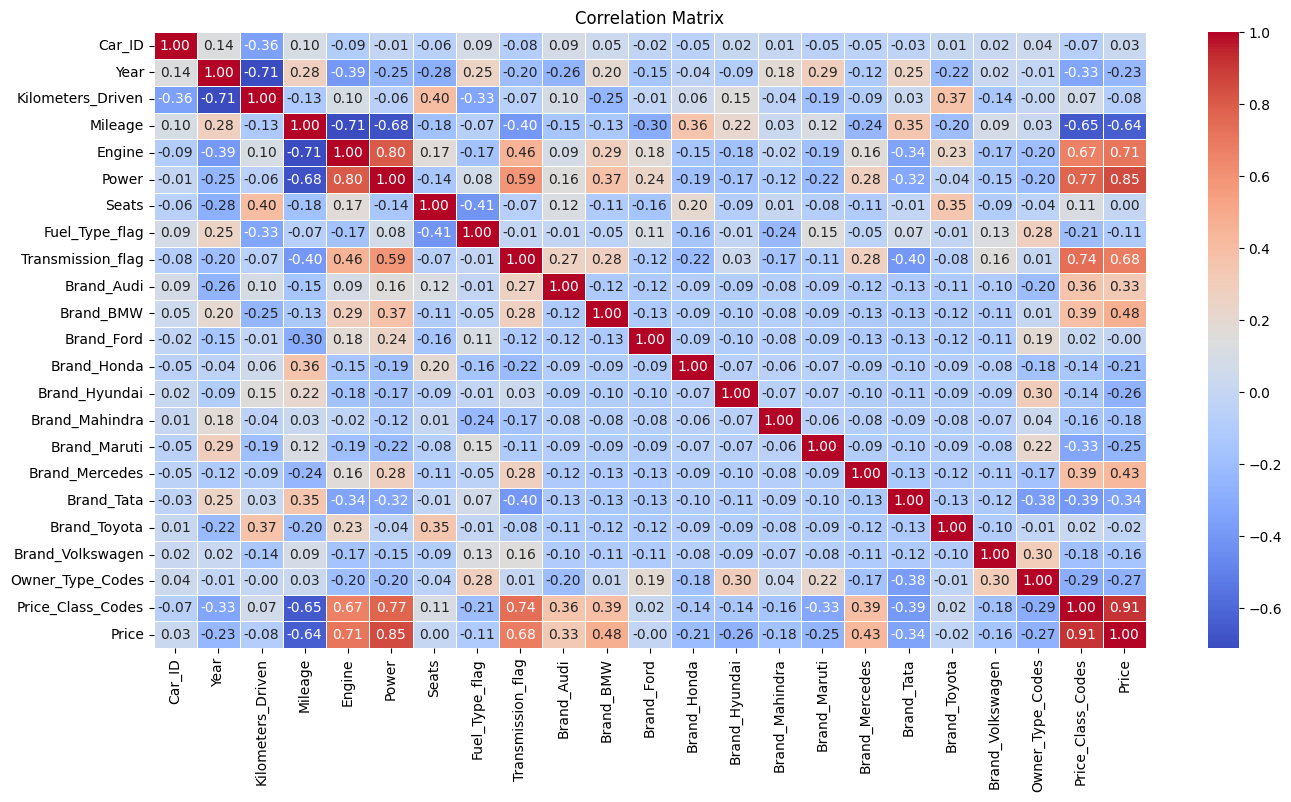


Columns that correlate with Price more than 0.5 or less than -0.5:
Mileage             -0.638404
Engine               0.710561
Power                0.849137
Transmission_flag    0.680731
Price_Class_Codes    0.914731
Price                1.000000
Name: Price, dtype: float64


In [19]:
# Combining X_train and y_train into one DataFrame
X_train_with_y = pd.concat([X_train, y_train], axis=1)

# Building the correlation matrix
correlation_matrix = X_train_with_y.corr()

# Filtering columns where the correlation with Price is greater than 0.5 or less than -0.5
correlation_with_target = correlation_matrix['Price']
strong_correlations = correlation_with_target[correlation_with_target.abs() > 0.5]

# Building a heatmap for the correlation matrix
plt.figure(figsize=(16, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Adding a title and configuring the display
plt.title('Correlation Matrix')
plt.show()

# Printing the results
print("\nColumns that correlate with Price more than 0.5 or less than -0.5:")
print(strong_correlations)

## Correlation Analysis Insights

The correlation analysis revealed the following key relationships between features and car prices:

- **Mileage:** There is a negative correlation between mileage and price, indicating that cars with higher mileage tend to have lower prices. This aligns with the expectation that higher mileage generally implies more wear and tear, leading to a decrease in value.
- **Engine and Power:** Both engine capacity and power exhibit a strong positive correlation with price. This suggests that cars with larger engines and higher power output are typically more expensive, reflecting their performance capabilities and desirability.
- **Transmission_flag:** The transmission type (automatic or manual) shows a positive correlation with price. This implies that cars with automatic transmissions are generally priced higher than those with manual transmissions, likely due to their convenience and ease of use.

# 6. Linear Regression Model Training
- Train a Linear Regression model using scikit-learn on the numerical features in the training set (`X_train`).
- Create an instance of the `LinearRegression` class.
- Fit the model to the training data using the `fit()` method.
- Make predictions on both the training set (`X_train`) and the testing set (`X_test`).
- Calculate and display the Root Mean Squared Error (RMSE) to evaluate the model's performance.


In [20]:
# Initializing the linear regression model
model = LinearRegression()

# Training the model on numerical data
model.fit(X_train, y_train)

# Making predictions on the training set
train_predictions = model.predict(X_train)

# Calculating RMSE for train
loss_train = root_mean_squared_error(y_train, train_predictions)


In [21]:
# Making predictions on the testing data
test_predictions = model.predict(X_test)

# Calculating RMSE for test
loss_test = root_mean_squared_error(y_test, test_predictions)

In [22]:
print("RMSE on the training set:", loss_train)
print("RMSE on the testing set:", loss_test)

RMSE on the training set: 200018.3356339149
RMSE on the testing set: 238421.23842360164


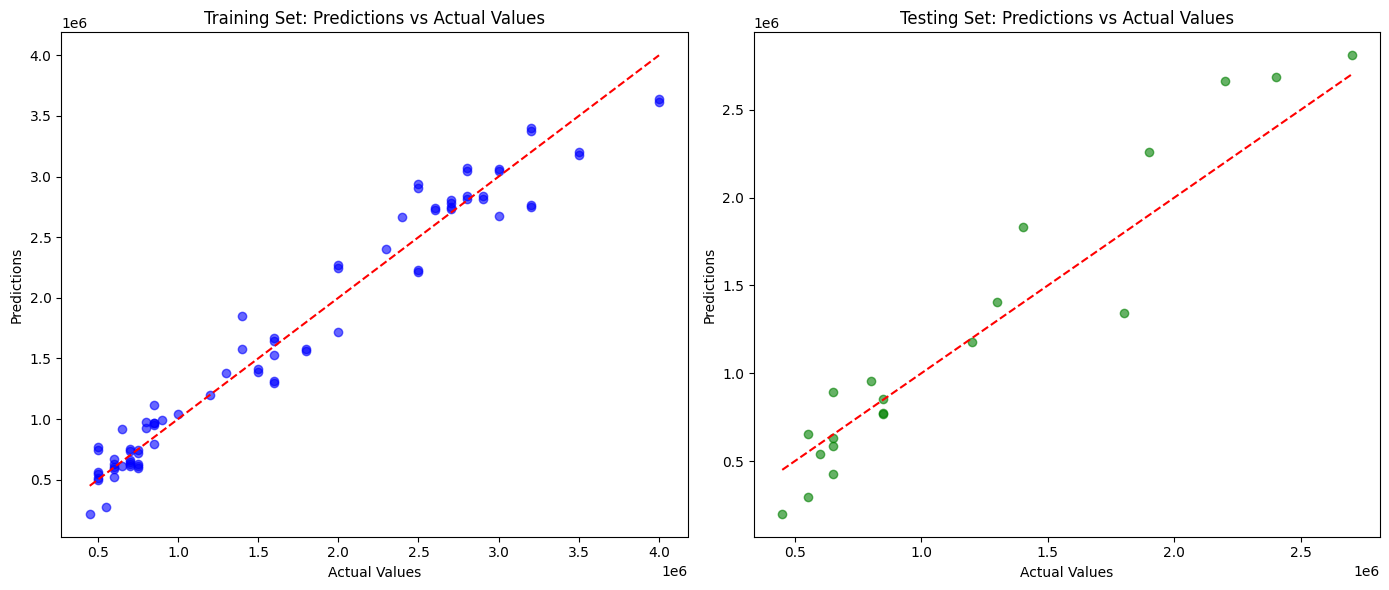

In [23]:
# Creating a plot for the training set
plt.figure(figsize=(14, 6))

# Plot for the training set
plt.subplot(1, 2, 1)
plt.scatter(y_train, train_predictions, color='blue', alpha=0.6)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red', linestyle='--')
plt.title('Training Set: Predictions vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predictions')

# Plot for the testing set
plt.subplot(1, 2, 2)
plt.scatter(y_test, test_predictions, color='green', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Testing Set: Predictions vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predictions')

# Showing the plot
plt.tight_layout()
plt.show()


## Model Performance on Training and Testing Sets

**Training Set:**
- The model demonstrates high prediction accuracy on the training set, as indicated by the scatter plot where the points closely follow the equality line.
- This suggests the model has learned the relationships between features and car prices effectively within the training data.

**Testing Set:**
- On the testing set, which comprises 20% of the data, the model maintains a good overall trend, indicating its ability to generalize to unseen data.
- While there might be some deviations from the equality line, the model still captures the general patterns and relationships between features and prices.

## 7. Feature Scaling and Model Analysis
- Scale numerical features using `StandardScaler` to improve model performance.
- Train the model on scaled data and analyze the coefficients to identify influential features.
- Assess the direction of influence (positive or negative) and its logical consistency with the features' meaning.


In [24]:
# Initializing StandardScaler
scaler = StandardScaler()

# Scaling the training set (calling fit and transform)
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)

# Scaling the testing set (calling only transform)
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)


In [25]:
# Training the model on scaled data
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Viewing model coefficients
coefficients = pd.DataFrame({'Feature': X_train_scaled.columns, 'Coefficient': model.coef_})
print(coefficients.sort_values(by='Coefficient', ascending=False))

# Analyzing coefficients
print("\nMost influential columns:")
print(coefficients.sort_values(by='Coefficient', key=abs, ascending=False).head(5))

              Feature    Coefficient
5               Power  435496.753081
21  Price_Class_Codes  260389.889836
16     Brand_Mercedes  175126.744282
9          Brand_Audi  165896.115609
10          Brand_BMW  160223.157440
20   Owner_Type_Codes   77141.045853
8   Transmission_flag   26343.176946
4              Engine   17287.079786
0              Car_ID   14381.488690
18       Brand_Toyota   11631.643280
1                Year   -2169.794044
6               Seats  -16317.111193
17         Brand_Tata  -29084.619186
3             Mileage  -58997.950048
19   Brand_Volkswagen  -59976.048167
12        Brand_Honda  -60832.220132
15       Brand_Maruti  -70013.069782
2   Kilometers_Driven  -87830.727080
11         Brand_Ford -116981.324545
14     Brand_Mahindra -117738.208154
7      Fuel_Type_flag -140958.970696
13      Brand_Hyundai -145636.784703

Most influential columns:
              Feature    Coefficient
5               Power  435496.753081
21  Price_Class_Codes  260389.889836
16     Bran

## Interpreting Model Coefficients

**Positive Coefficients (Increase Predicted Price):**
- **Power:** Higher engine power is associated with a higher predicted price, which is logical as more powerful cars are generally more expensive.
- **Brand (Mercedes, BMW, Audi):** Cars from these luxury brands tend to have higher predicted prices, reflecting their premium positioning in the market.
- **Price_Class_Codes:** This feature, representing the price class (Economy, Mid-range, Luxury), has a positive coefficient. This suggests that cars classified as Luxury or Mid-range have higher predicted prices compared to Economy cars, aligning with expectations.

**Negative Coefficients (Decrease Predicted Price):**
- **Fuel_Type_flag:** This binary flag (0 for Diesel, 1 for Petrol) has a negative coefficient, indicating that diesel cars are generally predicted to have lower prices compared to petrol cars. This is consistent with market trends where diesel cars often have lower resale values.
- **Brand (Mahindra, Hyundai):** Cars from these brands are associated with lower predicted prices, suggesting they are positioned as more budget-friendly options in the market.

**Overall:**
- The model's coefficients align with general market trends and logical expectations regarding car pricing.
- This consistency supports the adequacy of the model in capturing the relationships between features and car prices.

# 8. Statistical Significance Analysis
- Train the model using `statsmodels` on the scaled data to obtain p-values for coefficients.
- Analyze the p-values to identify statistically significant features at a significance level of 0.05.


In [26]:
# Adding a constant for the intercept
X_train_scaled_with_const = sm.add_constant(X_train_scaled)

# Creating and training the model
model = sm.OLS(y_train, X_train_scaled_with_const)
results = model.fit()

# Printing the report
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     71.03
Date:                Tue, 21 Jan 2025   Prob (F-statistic):           9.61e-34
Time:                        13:22:54   Log-Likelihood:                -1090.0
No. Observations:                  80   AIC:                             2224.
Df Residuals:                      58   BIC:                             2276.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.68e+06   2.63e+0

**Statistical Significance Insights:**

Features with p-values less than 0.05 are considered statistically significant, indicating a strong relationship with the target variable.



Statistically significant variables:
- Fuel_Type_flag: p-value = 0.004
- Brand_Maruti: p-value = 0.037
- Brand_Ford: p-value = 0.001
- Price_Class_Codes: p-value = 0.016
- const, Power, Brand_Mercedes, Brand_Audi, Brand_BMW, Brand_Hyundai, Brand_Mahindra: p-value = 0.000


## 9. Model Training on Statistically Significant Features
- Train a new model using only the statistically significant features identified in the previous step.
- Compare the performance of this model with the previous model trained on all features.


In [27]:
# Selecting statistically significant features
X_train_stat_sign = X_train_scaled[['Power', 'Kilometers_Driven', 'Brand_Audi', 'Brand_BMW', 'Brand_Hyundai', 'Brand_Mahindra', 'Brand_Mercedes', 'Brand_Toyota', 'Fuel_Type_flag',
 'Transmission_flag', 'Owner_Type_Codes', 'Price_Class_Codes']
]

# Training the model on statistically significant features
model = LinearRegression()
model.fit(X_train_stat_sign, y_train)

# Creating and training the model with statsmodels
results_significant = sm.OLS(y_train, X_train_stat_sign)

# Adding a constant for the intercept
X_train_stat_sign_with_const = sm.add_constant(X_train_stat_sign)

model = sm.OLS(y_train, X_train_stat_sign_with_const)
results = model.fit()

# Printing the report
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     131.4
Date:                Tue, 21 Jan 2025   Prob (F-statistic):           1.23e-41
Time:                        13:22:54   Log-Likelihood:                -1093.4
No. Observations:                  80   AIC:                             2213.
Df Residuals:                      67   BIC:                             2244.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.68e+06   2.55e+0

**Model Comparison:**
- The model trained on all features explained 96% of the variance in the target variable (R-squared = 0.963, Adjusted R-squared = 0.949).
- The model trained on statistically significant features achieved a slightly lower R-squared (0.959) but a higher Adjusted R-squared (0.952).
- This suggests that the model with statistically significant features is more efficient, achieving similar performance with fewer features and reducing the risk of overfitting.


# 10. Model Training with Relaxed Feature Selection
- Experiment with a less strict feature selection criteria (e.g., p-value < 0.25) to explore potential improvements.
- Compare the performance of this model with the previous models.

In [28]:
# Selecting features with p-value < 0.25
features_p_value_below_025 = ['Power', 'Fuel_Type_flag', 'Brand_Audi', 'Brand_BMW', 'Brand_Ford', 'Brand_Hyundai', 'Brand_Mahindra', 'Brand_Mercedes', 'Owner_Type_Codes', 'Kilometers_Driven',
'Mileage', 'Engine', 'Brand_Honda', 'Brand_Maruti', 'Brand_Volkswagen', 'Seats',
'Transmission_flag', 'Brand_Tata', 'Brand_Toyota']

# Forming X_train with selected features
X_train_p_value_filtered = X_train_scaled[features_p_value_below_025]

# Adding a constant for the model
X_train_p_value_filtered_with_const = sm.add_constant(X_train_p_value_filtered)

# Creating and training the model
model_p_value_filtered = sm.OLS(y_train, X_train_p_value_filtered_with_const)
results_p_value_filtered = model_p_value_filtered.fit()

# Printing the report
print(results_p_value_filtered.summary())


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     78.43
Date:                Tue, 21 Jan 2025   Prob (F-statistic):           2.64e-35
Time:                        13:22:54   Log-Likelihood:                -1094.1
No. Observations:                  80   AIC:                             2226.
Df Residuals:                      61   BIC:                             2271.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.68e+06   2.69e+0

**Model Comparison:**
- The model with relaxed feature selection (p-value < 0.25) did not improve performance compared to the model with statistically significant features.
- The Adjusted R-squared was lower (0.946), indicating a less efficient model.



# Model Selection and Evaluation

Based on the analysis, the model trained on statistically significant features is the preferred choice.
This is because:
- It achieves the highest Adjusted R-squared, indicating a good balance between accuracy and model complexity.
- It uses a smaller number of features, reducing the risk of overfitting and improving model generalizability.


In [29]:
# Transforming the testing set
X_test_stat_sign = X_test_scaled[['Power', 'Kilometers_Driven', 'Brand_Audi', 'Brand_BMW', 'Brand_Hyundai', 'Brand_Mahindra', 'Brand_Mercedes', 'Brand_Toyota', 'Fuel_Type_flag',
 'Transmission_flag', 'Owner_Type_Codes', 'Price_Class_Codes']]

# Training the model
model = LinearRegression()
model.fit(X_train_stat_sign, y_train)

# Predictions
train_predictions = model.predict(X_train_stat_sign)
test_predictions = model.predict(X_test_stat_sign)

# Calculating RMSE
loss_train = root_mean_squared_error(y_train, train_predictions)
loss_test = root_mean_squared_error(y_test, test_predictions)

# Displaying model coefficients
coefficients = pd.DataFrame({
    'Feature': X_train_stat_sign.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

# Printing results
print("\nModel Coefficients:")
print(coefficients)
print("\nRMSE on training set:", loss_train)
print("RMSE on testing set:", loss_test)



Model Coefficients:
              Feature    Coefficient
0               Power  451588.309288
6      Brand_Mercedes  265108.359865
11  Price_Class_Codes  254008.535064
3           Brand_BMW  252654.680870
2          Brand_Audi  242839.595725
7        Brand_Toyota   95167.549005
10   Owner_Type_Codes   45655.847309
9   Transmission_flag   35242.156363
5      Brand_Mahindra  -55929.970910
1   Kilometers_Driven  -75649.841418
4       Brand_Hyundai  -82864.114803
8      Fuel_Type_flag -119633.831697

RMSE on training set: 208749.2993804312
RMSE on testing set: 252730.15710276633


 ## Final Model Performance and Observations

 **Initial Model RMSE:**
- Training set: 200018.3356339149
- Testing set: 238421.23842360164

**Final Model RMSE (with statistically significant features):**
- Training set: 208749.2993804312
- Testing set: 252730.15710276633

**Observations:**
- The RMSE on both the training and testing sets slightly increased after selecting only statistically significant features.
- This might indicate a slight loss of predictive information, leading to a decrease in overfitting but also a potential decrease in accuracy on unseen data.

**Further Improvements:**
- Further experimentation and model tuning could be explored to potentially improve the model's performance.
- This could involve trying different feature engineering techniques, exploring other model types, or adjusting hyperparameters.

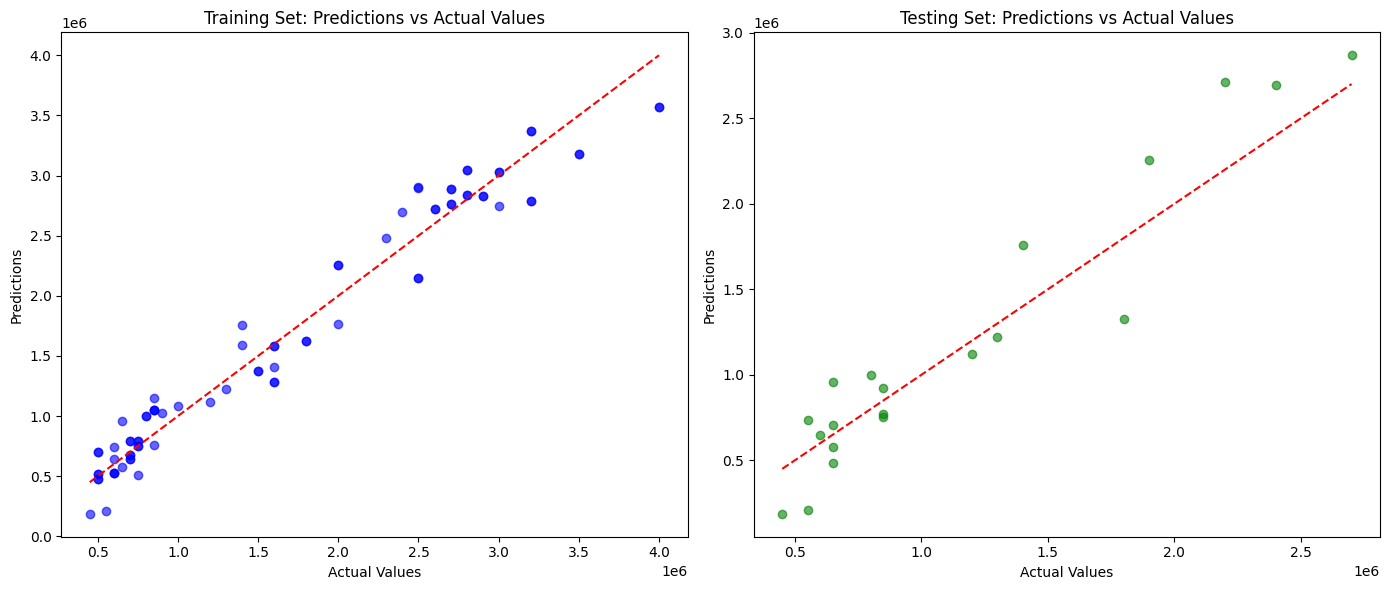

In [30]:
# Creating plots
plt.figure(figsize=(14, 6))

# Plot for the training set
plt.subplot(1, 2, 1)
plt.scatter(y_train, train_predictions, color='blue', alpha=0.6)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red', linestyle='--')
plt.title('Training Set: Predictions vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predictions')

# Plot for the testing set
plt.subplot(1, 2, 2)
plt.scatter(y_test, test_predictions, color='green', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Testing Set: Predictions vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predictions')

# Showing the plots
plt.tight_layout()
plt.show()
